<a href="https://colab.research.google.com/github/jaejunchoe/2023-Gumi-Industrial-Complex-Energy-Self-Sufficiency-Datathon/blob/main/copy_%22Switching_System_ipynb%22%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('example.xlsx')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13728 entries, 0 to 13727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   계측기명    13728 non-null  object        
 1   날짜      13728 non-null  datetime64[ns]
 2   시간      13728 non-null  int64         
 3   전력량     13728 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 429.1+ KB
None


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])

df.set_index('날짜', inplace=True)

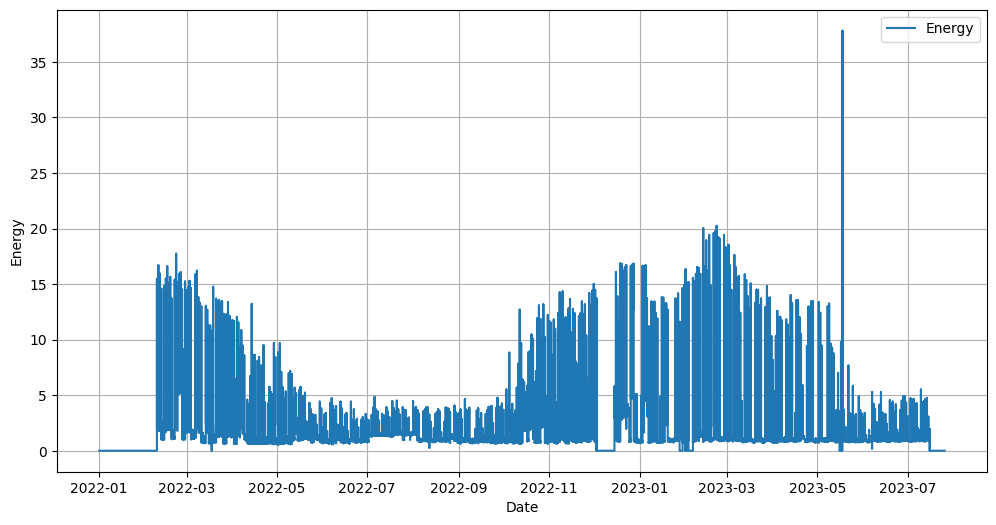

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['전력량'], label='Energy')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i in range(1, 20):
    print(i, df['전력량'].autocorr(i))

1 0.9170848692687266
2 0.8028905195236445
3 0.6863284892538699
4 0.5683271257365993
5 0.4453420096007988
6 0.3299819917068745
7 0.22564532392810885
8 0.1283475608530277
9 0.03604551024636234
10 -0.035200776595178444
11 -0.06284826424879535
12 -0.07028412582503694
13 -0.0671955309163012
14 -0.04541834126169348
15 0.014289593743200258
16 0.09079149647163892
17 0.17035642302236037
18 0.25436078286155994
19 0.3458919634781575


Здесь можно попробовать поставить разные параметры сдвига. От 1 по 6-7 значения весьма большие, поэтому можно попробовать делать сдвиги по-разному

In [ ]:
df.loc[:,'lag1'] = df['전력량'].shift(1)
df.loc[:,'lag2'] = df['전력량'].shift(2)
df.loc[:,'lag3'] = df['전력량'].shift(3)
df.loc[:,'lag4'] = df['전력량'].shift(4)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13728 entries, 2022-01-01 to 2023-07-26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   계측기명    13728 non-null  object 
 1   시간      13728 non-null  int64  
 2   전력량     13728 non-null  float64
 3   lag1    13727 non-null  float64
 4   lag2    13726 non-null  float64
 5   lag3    13725 non-null  float64
 6   lag4    13724 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 858.0+ KB
None


In [ ]:
df = df[(df['전력량'] != 0) & (df['lag1'] != 0) &
        (df['lag2'] != 0) & (df['lag3'] != 0) &
        (df['lag4'] != 0)]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12056 entries, 2022-02-09 to 2023-07-16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   계측기명    12056 non-null  object 
 1   시간      12056 non-null  int64  
 2   전력량     12056 non-null  float64
 3   lag1    12056 non-null  float64
 4   lag2    12056 non-null  float64
 5   lag3    12056 non-null  float64
 6   lag4    12056 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 753.5+ KB
None


In [ ]:
import numpy as np

print(df.isna().any())

계측기명    False
시간      False
전력량     False
lag1    False
lag2    False
lag3    False
lag4    False
dtype: bool


In [ ]:
df = df.drop(['계측기명'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12056 entries, 2022-02-09 to 2023-07-16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      12056 non-null  int64  
 1   전력량     12056 non-null  float64
 2   lag1    12056 non-null  float64
 3   lag2    12056 non-null  float64
 4   lag3    12056 non-null  float64
 5   lag4    12056 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 659.3 KB
None


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12056 entries, 0 to 12055
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      12056 non-null  int64  
 1   전력량     12056 non-null  float64
 2   lag1    12056 non-null  float64
 3   lag2    12056 non-null  float64
 4   lag3    12056 non-null  float64
 5   lag4    12056 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 565.2 KB
None
   시간    전력량    lag1    lag2    lag3    lag4
0  18  2.071  10.412  15.480  15.378   9.980
1  19  1.837   2.071  10.412  15.480  15.378
2  20  2.016   1.837   2.071  10.412  15.480
3  21  2.759   2.016   1.837   2.071  10.412
4  22  1.844   2.759   2.016   1.837   2.071


In [ ]:
y = df['전력량']
x = df.drop(['전력량'], axis=1)

Здесь можно поиграть с переменной времени. Нужно исследовать насколько сильно она влияет, в слествие чего выяснить нужна ли вообще она.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_ff_train = x_train
y_ff_train = y_train

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

r2_scores = {}

for n in range(2, 50):
  knr = KNeighborsRegressor(n_neighbors=n)
  knr.fit(x_train, y_train)
  predict_data_knr = knr.predict(x_test)
  r2_knr = r2_score(y_test, predict_data_knr)
  r2_scores[n] = r2_knr

In [ ]:
best_n_neighbors = max(r2_scores, key=r2_scores.get)
best_r2_score = r2_scores[best_n_neighbors]

print(f"Лучший параметр n_neighbors: {best_n_neighbors}")
print(f"Лучший показатель R^2: {best_r2_score}")

Лучший параметр n_neighbors: 10
Лучший показатель R^2: 0.9412985121014116


In [ ]:
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(x_train, y_train)
predict_knr = knr.predict(x_test)
knr_ens = knr.predict(x_train)

r2_knr_new = r2_score(y_test, predict_knr)
mae_knr = mean_absolute_error(y_test, predict_knr)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_knr:.2f}")
print(f"R-squared (R^2): {r2_knr_new:.2f}")

Mean Absolute Error (MAE): 0.49
R-squared (R^2): 0.94


In [ ]:
results_knr = pd.DataFrame(predict_knr, columns=['Pred'])
y_test_new = y_test.reset_index(drop=True)
results_knr['Test'] = y_test_new
print(results_knr.head(50))

       Pred    Test
0    2.3561   2.304
1    4.4437   4.218
2    2.8218   1.839
3    0.8782   0.885
4    4.5674   4.402
5    0.8275   0.800
6   10.6199   9.837
7    2.1692   2.320
8    1.7324   0.955
9   10.2780   7.175
10   2.3469   0.891
11   2.4673   2.537
12   1.5814   1.500
13   0.9529   0.758
14   1.3614   1.341
15   0.9353   1.055
16   0.8685   0.985
17   7.0159   7.855
18   2.7592   2.522
19   0.9212   1.092
20   1.1831   1.138
21   2.5599   2.329
22   3.0243   2.806
23  13.8870  15.918
24   0.9485   0.942
25   7.7569   8.817
26   1.5376   1.456
27   0.9274   0.811
28   9.2046   9.203
29   0.8645   0.724
30   0.8770   0.934
31   0.9768   1.139
32   5.1408   6.905
33  10.7856  11.686
34   6.2633   7.218
35   7.8587  12.704
36   2.2717   2.358
37  13.1927  12.656
38   0.8733   0.886
39   0.9341   1.088
40   1.0555   1.121
41   0.8566   0.804
42   1.3622   1.300
43   0.8751   0.840
44   3.2815   3.480
45  12.8455  14.380
46   0.9012   0.891
47   0.9094   0.728
48   0.8870   0.936


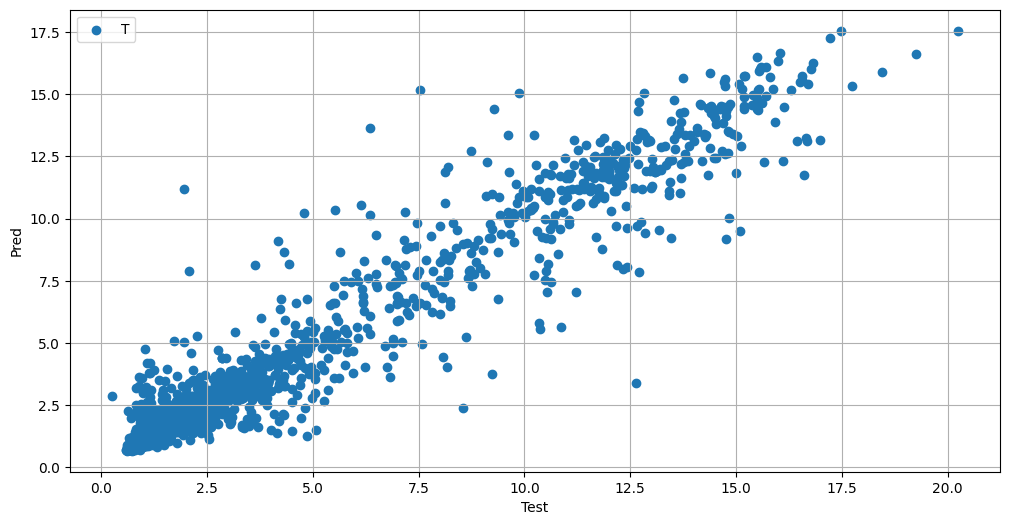

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_knr['Test'], results_knr['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
predict_lr = lr.predict(x_test)

r2_lr = r2_score(y_test, predict_lr)
mae_lr = mean_absolute_error(y_test, predict_lr)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R-squared (R^2): {r2_lr:.2f}")

Mean Absolute Error (MAE): 0.78
R-squared (R^2): 0.86


In [ ]:
results_lr = pd.DataFrame(predict_lr, columns=['Pred'])
results_lr['Test'] = y_test_new
print(results_lr.head(50))

         Pred    Test
0    2.063592   2.304
1    4.781064   4.218
2    1.953265   1.839
3    1.448858   0.885
4    4.579815   4.402
5    1.040875   0.800
6   10.839836   9.837
7    1.373899   2.320
8    1.308281   0.955
9    7.187334   7.175
10   1.195461   0.891
11   1.647704   2.537
12   1.542950   1.500
13   0.913604   0.758
14   1.730518   1.341
15   1.393313   1.055
16   1.372211   0.985
17   6.712515   7.855
18   2.632088   2.522
19   1.078874   1.092
20   1.587829   1.138
21   3.047241   2.329
22   2.930133   2.806
23  13.255884  15.918
24   1.435686   0.942
25   8.588467   8.817
26   1.623527   1.456
27   1.164805   0.811
28  10.805316   9.203
29   1.353123   0.724
30   1.260886   0.934
31   1.109164   1.139
32   2.479614   6.905
33   3.444063  11.686
34   6.829701   7.218
35   2.888975  12.704
36   2.440698   2.358
37  12.349315  12.656
38   1.025169   0.886
39   0.958738   1.088
40   1.399200   1.121
41   1.083836   0.804
42   2.460105   1.300
43   1.385106   0.840
44   3.334

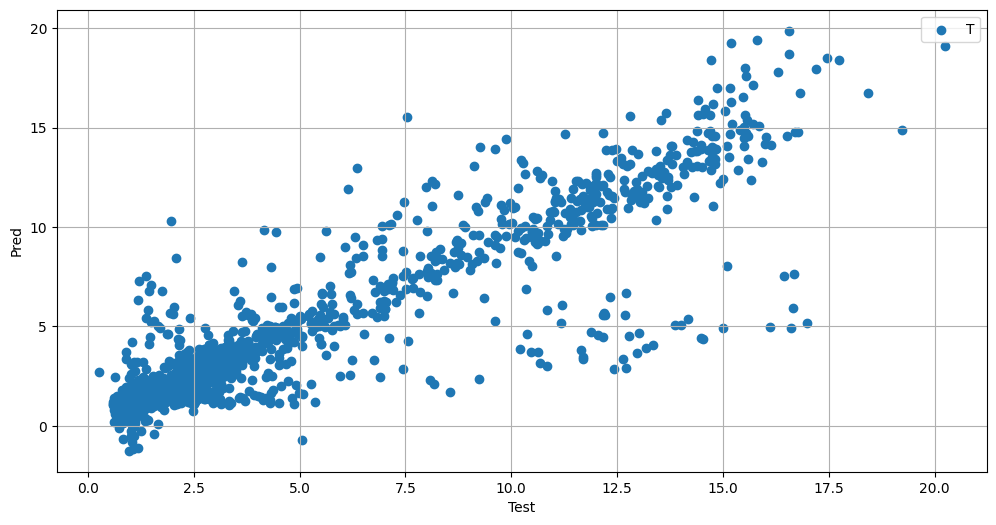

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_lr['Test'], results_lr['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR

params = {'C':[0.1,0.5,1,2,5,10,15,20], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
sv = SVR()
sg_v = GridSearchCV(sv, param_grid=params, refit=True, verbose=5, cv=TimeSeriesSplit(n_splits=5).split(x_train))
sg_v.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.850 total time=   0.5s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.850 total time=   1.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.830 total time=   1.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.850 total time=   1.6s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.832 total time=   2.5s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.655 total time=   0.2s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.656 total time=   1.9s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.674 total time=   3.2s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.671 total time=   6.6s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.669 total time=   7.6s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.773 total time=   0.9s
[CV 2/5] END .................C=0.1, kernel=rbf

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7adbbd19f220>,
             estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10, 15, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=5)

In [ ]:
predict_svm = sg_v.predict(x_test)

mae_svm = mean_absolute_error(y_test, predict_svm)
r2_svm = r2_score(y_test, predict_svm)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_svm:.2f}")
print(f"R-squared (R^2): {r2_svm:.2f}")

Mean Absolute Error (MAE): 0.57
R-squared (R^2): 0.89


In [ ]:
results_svm = pd.DataFrame(predict_svm, columns=['Pred'])
results_svm['Test'] = y_test_new
print(results_svm.head(50))

         Pred    Test
0    2.170386   2.304
1    4.694591   4.218
2    2.340339   1.839
3    1.131704   0.885
4    4.501406   4.402
5    0.720357   0.800
6   11.238808   9.837
7    1.146147   2.320
8    1.165493   0.955
9    8.075776   7.175
10   1.048084   0.891
11   1.573181   2.537
12   1.466157   1.500
13   0.889969   0.758
14   1.332309   1.341
15   0.901811   1.055
16   1.037260   0.985
17   8.045591   7.855
18   2.501228   2.522
19   0.889637   1.092
20   1.128070   1.138
21   2.669908   2.329
22   2.752086   2.806
23  14.850294  15.918
24   1.092920   0.942
25   9.440898   8.817
26   1.294497   1.456
27   0.746971   0.811
28   9.866038   9.203
29   0.869931   0.724
30   0.825610   0.934
31   0.942105   1.139
32   2.736231   6.905
33   4.122465  11.686
34   6.585323   7.218
35   3.371349  12.704
36   2.345654   2.358
37  13.587188  12.656
38   0.859733   0.886
39   0.847960   1.088
40   0.916160   1.121
41   0.809382   0.804
42   0.604027   1.300
43   0.860221   0.840
44   2.994

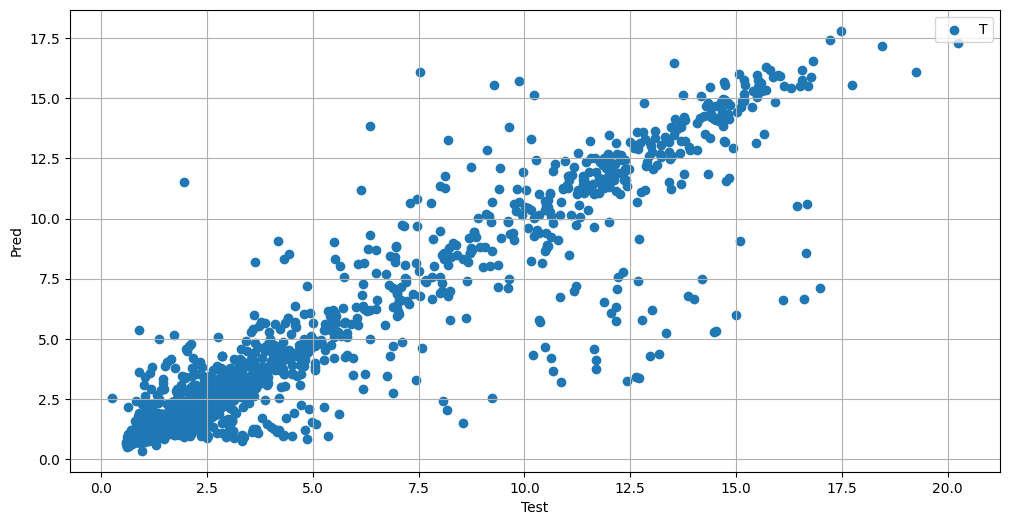

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_svm['Test'], results_svm['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Random Forest (1/2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 2, 4],  # Минимальное количество выборок в листовых узлах
}

In [ ]:
rf = RandomForestRegressor(random_state=42, verbose=1)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params_rf = grid_search.best_params_
best_score_rf = np.sqrt(-grid_search.best_score_)  # Преобразуем отрицательное MSE в RMSE
print(f"Лучшие параметры: {best_params_rf}")
print(f"Лучшая RMSE на обучающих данных: {best_score_rf}")

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Лучшая RMSE на обучающих данных: 0.9426269896497554


In [ ]:
# Получите предсказания на тестовых данных с лучшими параметрами
best_rf = grid_search.best_estimator_
predict_rf = best_rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


In [ ]:
r2_rf = r2_score(y_test, predict_rf)
mae_rf = mean_absolute_error(y_test, predict_rf)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R^2): {r2_rf:.2f}")

Mean Absolute Error (MAE): 0.45
R-squared (R^2): 0.95


In [ ]:
results_rf = pd.DataFrame(predict_rf, columns=['Pred'])
results_rf['Test'] = y_test_new
print(results_rf.head(50))

         Pred    Test
0    2.335975   2.304
1    4.544591   4.218
2    2.724099   1.839
3    0.896135   0.885
4    4.412602   4.402
5    0.803511   0.800
6   10.768454   9.837
7    2.570741   2.320
8    1.553648   0.955
9    6.446352   7.175
10   1.912288   0.891
11   2.410591   2.537
12   1.530135   1.500
13   0.937515   0.758
14   1.372124   1.341
15   0.890824   1.055
16   0.878518   0.985
17   8.071844   7.855
18   2.788686   2.522
19   0.868561   1.092
20   1.130498   1.138
21   2.584184   2.329
22   2.891481   2.806
23  15.133738  15.918
24   0.973719   0.942
25   7.989430   8.817
26   1.426483   1.456
27   0.816786   0.811
28  10.561066   9.203
29   0.898160   0.724
30   0.900963   0.934
31   0.961937   1.139
32   6.803774   6.905
33  11.427813  11.686
34   6.528886   7.218
35   7.999387  12.704
36   2.216966   2.358
37  12.920940  12.656
38   0.890921   0.886
39   0.887824   1.088
40   0.999449   1.121
41   0.774002   0.804
42   1.588458   1.300
43   0.900850   0.840
44   3.121

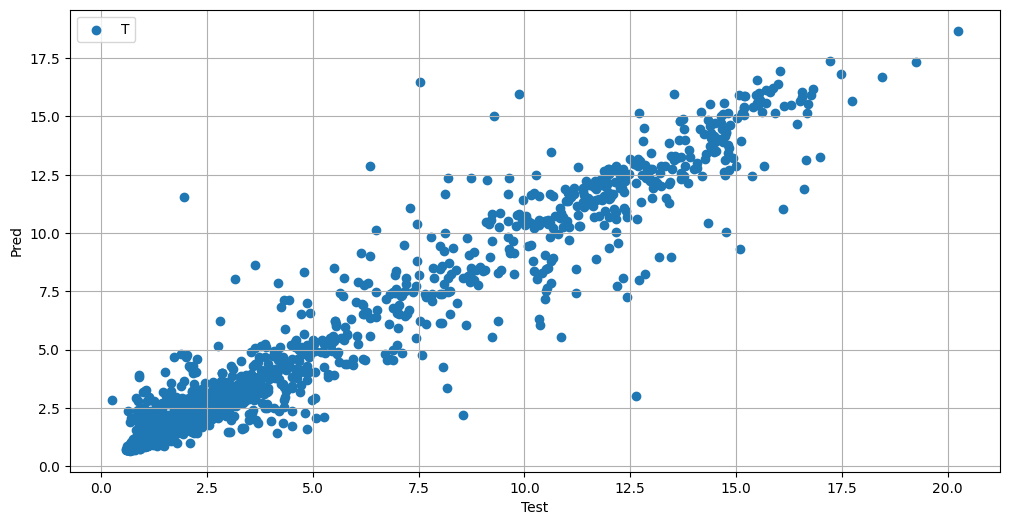

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_rf['Test'], results_rf['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 1

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

from keras.src.engine.sequential import input_layer
from keras.models import Sequential
from keras.layers import Dense, Dropout

model_nn1 = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1)  # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn1 = model_nn1.fit(x_train, y_train, epochs=150)

Epoch 1/150
242/242 [==============================] - 1s 1ms/step - loss: 6.8030 - mae: 1.4233
Epoch 2/150
242/242 [==============================] - 0s 1ms/step - loss: 2.0620 - mae: 0.7363
Epoch 3/150
242/242 [==============================] - 0s 1ms/step - loss: 1.8786 - mae: 0.7176
Epoch 4/150
242/242 [==============================] - 0s 1ms/step - loss: 1.7331 - mae: 0.6889
Epoch 5/150
242/242 [==============================] - 0s 1ms/step - loss: 1.6397 - mae: 0.6802
Epoch 6/150
242/242 [==============================] - 0s 1ms/step - loss: 1.5668 - mae: 0.6642
Epoch 7/150
242/242 [==============================] - 0s 1ms/step - loss: 1.5158 - mae: 0.6625
Epoch 8/150
242/242 [==============================] - 0s 1ms/step - loss: 1.4440 - mae: 0.6447
Epoch 9/150
242/242 [==============================] - 0s 1ms/step - loss: 1.4106 - mae: 0.6343
Epoch 10/150
242/242 [==============================] - 0s 2ms/step - loss: 1.3879 - mae: 0.6334
Epoch 11/150
242/242 [=================

In [ ]:
# Предсказание на тестовых данных
predict_nn1 = model_nn1.predict(x_test)

nn_ens = model_nn1.predict(x_ff_train)

# Рассчитайте MAE и R-squared
mae_nn1 = mean_absolute_error(y_test, predict_nn1)
r2_nn1 = r2_score(y_test, predict_nn1)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn1:.2f}")
print(f"R-squared (R^2): {r2_nn1:.2f}")

302/302 [==============================] - 0s 928us/step
Mean Absolute Error (MAE): 0.49
R-squared (R^2): 0.95


In [ ]:
results_nn1 = pd.DataFrame(predict_nn1, columns=['Pred'])
results_nn1['Test'] = y_test_new
print(results_nn1.head(50))

         Pred    Test
0    2.413934   2.304
1    4.515997   4.218
2    2.908277   1.839
3    0.955064   0.885
4    4.374720   4.402
5    0.795480   0.800
6   10.231755   9.837
7    2.265094   2.320
8    2.047354   0.955
9    6.988915   7.175
10   1.823169   0.891
11   2.747939   2.537
12   1.571419   1.500
13   0.936140   0.758
14   1.339089   1.341
15   0.920841   1.055
16   0.920449   0.985
17   7.183731   7.855
18   2.707230   2.522
19   0.983639   1.092
20   1.119479   1.138
21   2.750099   2.329
22   3.112589   2.806
23  14.259075  15.918
24   1.026644   0.942
25   8.545216   8.817
26   1.328310   1.456
27   0.860896   0.811
28   9.253448   9.203
29   0.912964   0.724
30   0.872408   0.934
31   1.022008   1.139
32   5.839789   6.905
33  10.680841  11.686
34   6.913207   7.218
35   7.882025  12.704
36   2.169583   2.358
37  13.788455  12.656
38   0.917880   0.886
39   0.890802   1.088
40   0.992761   1.121
41   0.872657   0.804
42   0.774958   1.300
43   0.915177   0.840
44   2.532

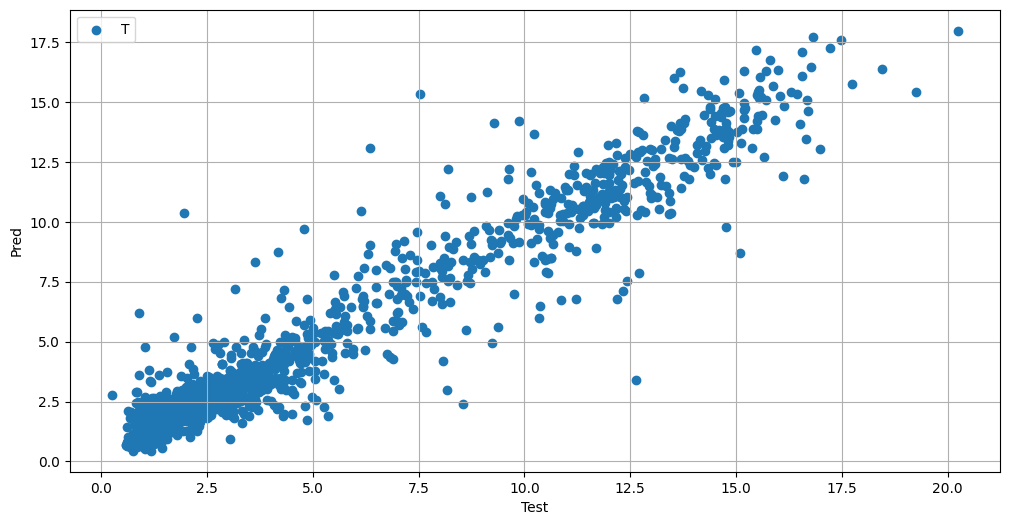

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn1['Test'], results_nn1['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 2

In [ ]:
model_nn2 = Sequential([
    Dense(7, activation='relu', input_shape=(5,)),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1)  # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn2 = model_nn2.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 3s 7ms/step - loss: 8.3932 - mae: 1.7698 - val_loss: 3.1684 - val_mae: 1.1195
Epoch 2/150
242/242 [==============================] - 1s 4ms/step - loss: 3.1932 - mae: 1.0742 - val_loss: 2.6643 - val_mae: 0.9797
Epoch 3/150
242/242 [==============================] - 1s 4ms/step - loss: 2.7185 - mae: 0.9416 - val_loss: 2.2742 - val_mae: 0.8746
Epoch 4/150
242/242 [==============================] - 1s 4ms/step - loss: 2.3839 - mae: 0.8486 - val_loss: 2.0820 - val_mae: 0.8176
Epoch 5/150
242/242 [==============================] - 1s 3ms/step - loss: 2.2243 - mae: 0.8073 - val_loss: 1.9721 - val_mae: 0.7688
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 2.1013 - mae: 0.7743 - val_loss: 1.8675 - val_mae: 0.7394
Epoch 7/150
242/242 [==============================] - 1s 3ms/step - loss: 2.0078 - mae: 0.7537 - val_loss: 1.8219 - val_mae: 0.7402
Epoch 8/150
242/242 [==============================] - 1s 3ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn2 = model_nn2.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn2 = mean_absolute_error(y_test, predict_nn2)
r2_nn2 = r2_score(y_test, predict_nn2)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn2:.2f}")
print(f"R-squared (R^2): {r2_nn2:.2f}")

76/76 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.56
R-squared (R^2): 0.94


In [ ]:
results_nn2 = pd.DataFrame(predict_nn2, columns=['Pred'])
results_nn2['Test'] = y_test_new
print(results_nn2.head(50))

         Pred    Test
0    2.315827   2.304
1    4.811144   4.218
2    2.089367   1.839
3    1.210382   0.885
4    4.484033   4.402
5    0.932675   0.800
6   10.919884   9.837
7    1.528851   2.320
8    1.730631   0.955
9    6.391191   7.175
10   1.573702   0.891
11   3.229871   2.537
12   1.336206   1.500
13   0.985967   0.758
14   1.339620   1.341
15   1.011901   1.055
16   1.140229   0.985
17   7.452630   7.855
18   2.336856   2.522
19   1.056985   1.092
20   0.938397   1.138
21   2.640908   2.329
22   2.926865   2.806
23  14.294948  15.918
24   1.147591   0.942
25   8.921598   8.817
26   1.355097   1.456
27   0.947419   0.811
28   9.730289   9.203
29   0.879854   0.724
30   0.941652   0.934
31   1.081615   1.139
32   6.954025   6.905
33  10.228004  11.686
34   6.441140   7.218
35   8.424568  12.704
36   2.479702   2.358
37  12.918812  12.656
38   0.927296   0.886
39   0.977047   1.088
40   1.001251   1.121
41   1.084450   0.804
42   2.221731   1.300
43   0.897413   0.840
44   2.746

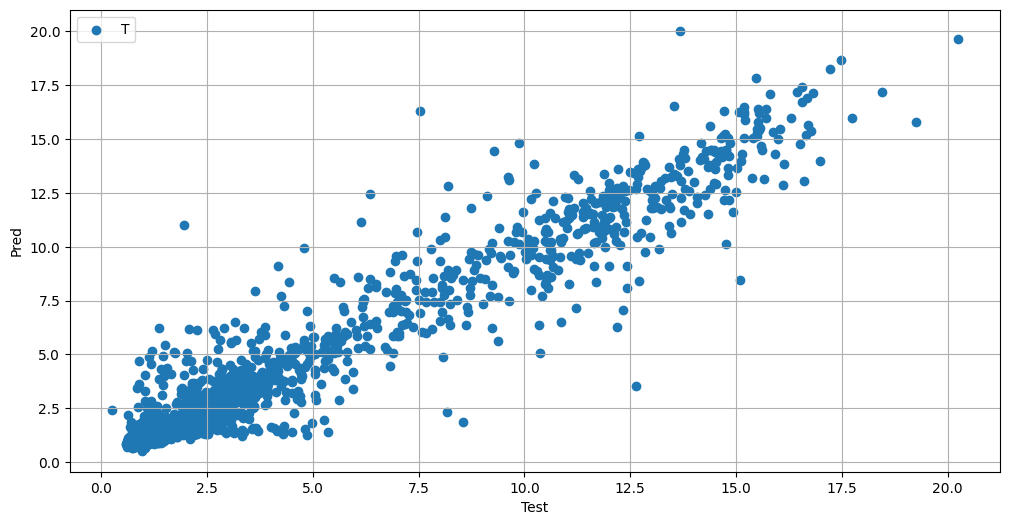

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn2['Test'], results_nn2['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 3

In [ ]:
model_nn3 = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(16, activation='relu'),
    Dense(1)  # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn3 = model_nn3.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 2s 3ms/step - loss: 9.8062 - mae: 1.8004 - val_loss: 2.7795 - val_mae: 0.9630
Epoch 2/150
242/242 [==============================] - 1s 2ms/step - loss: 2.5937 - mae: 0.8607 - val_loss: 1.9969 - val_mae: 0.7284
Epoch 3/150
242/242 [==============================] - 1s 3ms/step - loss: 2.0811 - mae: 0.7275 - val_loss: 1.7571 - val_mae: 0.6671
Epoch 4/150
242/242 [==============================] - 1s 2ms/step - loss: 1.8985 - mae: 0.7117 - val_loss: 1.6454 - val_mae: 0.6793
Epoch 5/150
242/242 [==============================] - 1s 3ms/step - loss: 1.8087 - mae: 0.7002 - val_loss: 1.6074 - val_mae: 0.6732
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 1.7439 - mae: 0.7025 - val_loss: 1.5667 - val_mae: 0.7039
Epoch 7/150
242/242 [==============================] - 1s 3ms/step - loss: 1.6901 - mae: 0.6885 - val_loss: 1.5068 - val_mae: 0.6659
Epoch 8/150
242/242 [==============================] - 1s 4ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn3 = model_nn3.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn3 = mean_absolute_error(y_test, predict_nn3)
r2_nn3 = r2_score(y_test, predict_nn3)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn3:.2f}")
print(f"R-squared (R^2): {r2_nn3:.2f}")

76/76 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.55
R-squared (R^2): 0.94


In [ ]:
results_nn3 = pd.DataFrame(predict_nn3, columns=['Pred'])
results_nn3['Test'] = y_test_new
print(results_nn3.head(50))

         Pred    Test
0    2.560302   2.304
1    4.018455   4.218
2    2.551881   1.839
3    1.248430   0.885
4    4.724140   4.402
5    0.862091   0.800
6   10.637370   9.837
7    2.177501   2.320
8    2.136405   0.955
9    6.263352   7.175
10   1.842401   0.891
11   3.071863   2.537
12   1.569739   1.500
13   1.041767   0.758
14   1.707393   1.341
15   1.221369   1.055
16   1.168840   0.985
17   8.162434   7.855
18   2.526721   2.522
19   0.889061   1.092
20   1.478297   1.138
21   2.665095   2.329
22   3.122866   2.806
23  15.069114  15.918
24   1.317022   0.942
25   8.737078   8.817
26   1.378471   1.456
27   1.012235   0.811
28   9.297270   9.203
29   1.287180   0.724
30   1.123784   0.934
31   1.029834   1.139
32   6.363379   6.905
33  10.100986  11.686
34   7.281967   7.218
35   8.041658  12.704
36   2.634417   2.358
37  13.309371  12.656
38   1.025467   0.886
39   0.843336   1.088
40   1.291218   1.121
41   1.027735   0.804
42   0.880756   1.300
43   1.271338   0.840
44   3.173

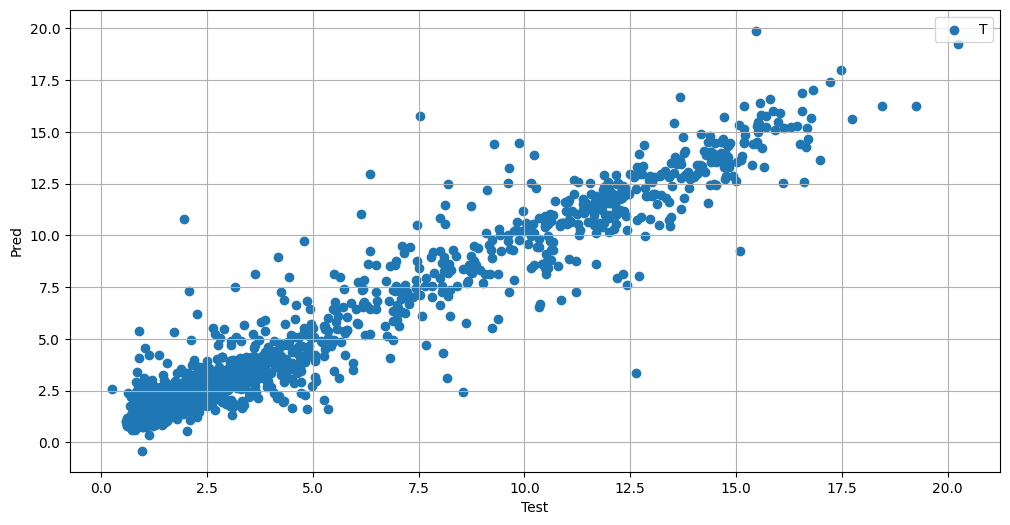

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn3['Test'], results_nn3['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 4

In [ ]:
model_nn4 = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn4 = model_nn4.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 2s 4ms/step - loss: 4.4632 - mae: 1.0967 - val_loss: 1.6207 - val_mae: 0.6443
Epoch 2/150
242/242 [==============================] - 1s 3ms/step - loss: 1.7261 - mae: 0.6932 - val_loss: 1.4689 - val_mae: 0.6756
Epoch 3/150
242/242 [==============================] - 1s 4ms/step - loss: 1.5676 - mae: 0.6731 - val_loss: 1.3070 - val_mae: 0.5889
Epoch 4/150
242/242 [==============================] - 1s 4ms/step - loss: 1.4320 - mae: 0.6395 - val_loss: 1.3918 - val_mae: 0.7384
Epoch 5/150
242/242 [==============================] - 1s 4ms/step - loss: 1.3326 - mae: 0.6372 - val_loss: 1.2946 - val_mae: 0.6477
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 1.2517 - mae: 0.6108 - val_loss: 1.1634 - val_mae: 0.5967
Epoch 7/150
242/242 [==============================] - 1s 5ms/step - loss: 1.1893 - mae: 0.5957 - val_loss: 1.1613 - val_mae: 0.5383
Epoch 8/150
242/242 [==============================] - 2s 6ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn4 = model_nn4.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn4 = mean_absolute_error(y_test, predict_nn4)
r2_nn4 = r2_score(y_test, predict_nn4)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn4:.2f}")
print(f"R-squared (R^2): {r2_nn4:.2f}")

76/76 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.49
R-squared (R^2): 0.94


In [ ]:
results_nn4 = pd.DataFrame(predict_nn4, columns=['Pred'])
results_nn4['Test'] = y_test_new
print(results_nn4.head(50))

         Pred    Test
0    2.036004   2.304
1    4.608889   4.218
2    3.462421   1.839
3    0.917424   0.885
4    4.679222   4.402
5    0.810591   0.800
6   11.064279   9.837
7    2.623131   2.320
8    2.312855   0.955
9    7.193791   7.175
10   2.100622   0.891
11   3.095804   2.537
12   1.479260   1.500
13   0.879615   0.758
14   1.192807   1.341
15   0.862356   1.055
16   0.896571   0.985
17   9.474489   7.855
18   2.823730   2.522
19   0.844534   1.092
20   1.002698   1.138
21   2.796264   2.329
22   3.127222   2.806
23  15.888891  15.918
24   0.954156   0.942
25   9.041351   8.817
26   1.264812   1.456
27   0.837106   0.811
28  10.144933   9.203
29   0.799246   0.724
30   0.828262   0.934
31   0.965644   1.139
32   7.476953   6.905
33  13.362945  11.686
34   7.295883   7.218
35   9.317703  12.704
36   2.478232   2.358
37  13.462769  12.656
38   0.801407   0.886
39   0.772815   1.088
40   0.918116   1.121
41   0.845907   0.804
42   1.629647   1.300
43   0.804610   0.840
44   3.148

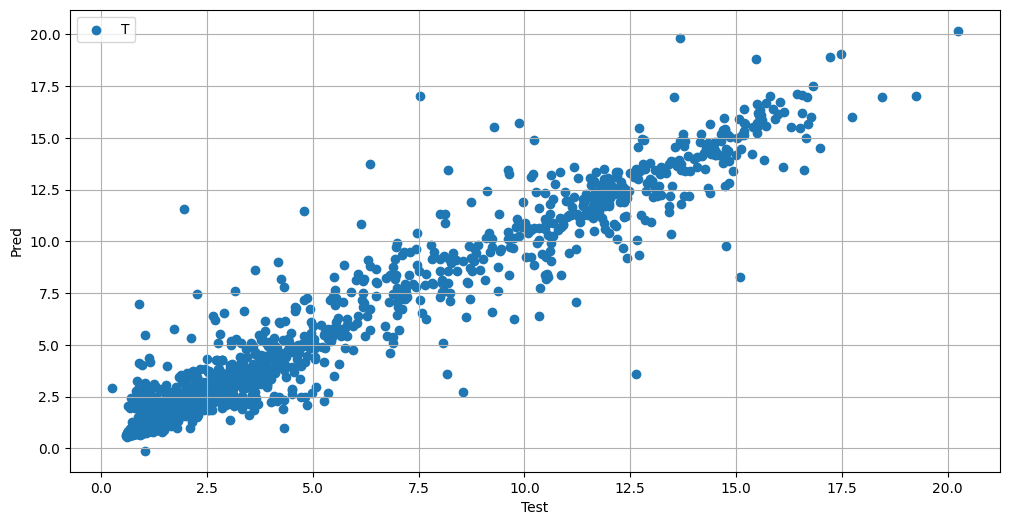

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn4['Test'], results_nn4['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 5

In [ ]:
model_nn5 = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn5.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn5 = model_nn5.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 2s 4ms/step - loss: 5.7423 - mae: 1.2642 - val_loss: 1.8636 - val_mae: 0.6668
Epoch 2/150
242/242 [==============================] - 1s 4ms/step - loss: 1.9242 - mae: 0.7115 - val_loss: 1.7157 - val_mae: 0.6673
Epoch 3/150
242/242 [==============================] - 1s 4ms/step - loss: 1.7537 - mae: 0.7003 - val_loss: 1.5198 - val_mae: 0.6336
Epoch 4/150
242/242 [==============================] - 1s 4ms/step - loss: 1.6315 - mae: 0.6736 - val_loss: 1.4347 - val_mae: 0.6306
Epoch 5/150
242/242 [==============================] - 1s 5ms/step - loss: 1.5416 - mae: 0.6618 - val_loss: 1.4067 - val_mae: 0.6621
Epoch 6/150
242/242 [==============================] - 2s 6ms/step - loss: 1.4700 - mae: 0.6493 - val_loss: 1.3360 - val_mae: 0.6335
Epoch 7/150
242/242 [==============================] - 1s 4ms/step - loss: 1.4120 - mae: 0.6363 - val_loss: 1.2965 - val_mae: 0.6054
Epoch 8/150
242/242 [==============================] - 1s 3ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn5 = model_nn5.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn5 = mean_absolute_error(y_test, predict_nn5)
r2_nn5 = r2_score(y_test, predict_nn5)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn5:.2f}")
print(f"R-squared (R^2): {r2_nn5:.2f}")

76/76 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.52
R-squared (R^2): 0.95


In [ ]:
results_nn5 = pd.DataFrame(predict_nn5, columns=['Pred'])
results_nn5['Test'] = y_test_new
print(results_nn5.head(50))

         Pred    Test
0    2.185605   2.304
1    4.281751   4.218
2    2.813076   1.839
3    0.752446   0.885
4    4.432247   4.402
5    0.635495   0.800
6   11.061440   9.837
7    2.245802   2.320
8    2.093876   0.955
9    6.812987   7.175
10   1.937534   0.891
11   2.653274   2.537
12   1.197139   1.500
13   0.622114   0.758
14   1.075624   1.341
15   0.670902   1.055
16   0.720901   0.985
17   7.999950   7.855
18   2.646048   2.522
19   0.741708   1.092
20   0.839196   1.138
21   2.506322   2.329
22   3.004256   2.806
23  15.470633  15.918
24   0.800505   0.942
25   8.925260   8.817
26   1.110890   1.456
27   0.629790   0.811
28   9.284283   9.203
29   0.587020   0.724
30   0.641647   0.934
31   0.738797   1.139
32   5.487500   6.905
33  10.776027  11.686
34   7.060289   7.218
35   7.636202  12.704
36   2.393508   2.358
37  13.271253  12.656
38   0.709671   0.886
39   0.738817   1.088
40   0.727957   1.121
41   0.970938   0.804
42   0.902644   1.300
43   0.590346   0.840
44   2.652

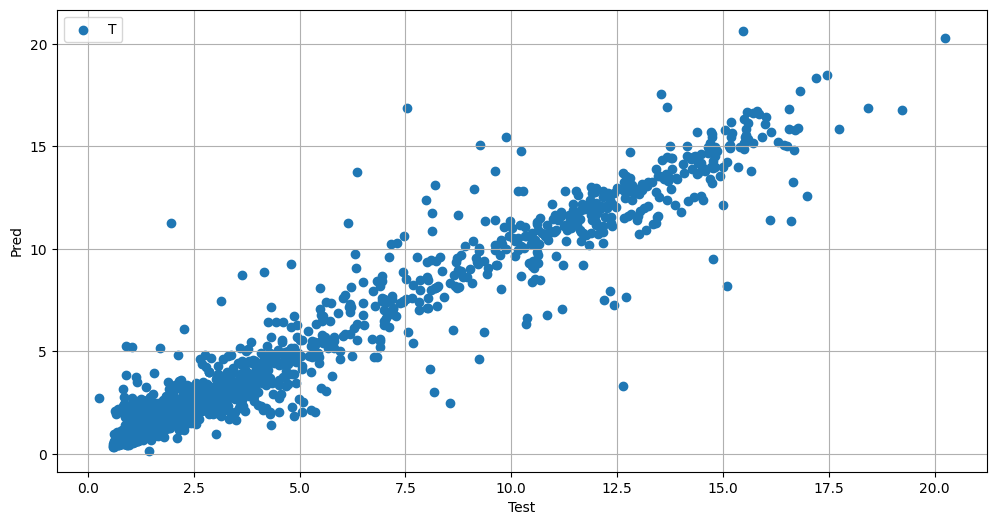

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn5['Test'], results_nn5['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 6

In [ ]:
model_nn6 = Sequential([
    Dense(300, activation='relu', input_shape=(5,)),
    Dense(200, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn6.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn6 = model_nn6.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 3s 7ms/step - loss: 3.7755 - mae: 1.0244 - val_loss: 1.7182 - val_mae: 0.6306
Epoch 2/150
242/242 [==============================] - 1s 5ms/step - loss: 1.6783 - mae: 0.6771 - val_loss: 1.8319 - val_mae: 0.7600
Epoch 3/150
242/242 [==============================] - 2s 9ms/step - loss: 1.5276 - mae: 0.6694 - val_loss: 1.3293 - val_mae: 0.6310
Epoch 4/150
242/242 [==============================] - 2s 7ms/step - loss: 1.3414 - mae: 0.6343 - val_loss: 1.2242 - val_mae: 0.6151
Epoch 5/150
242/242 [==============================] - 1s 4ms/step - loss: 1.2620 - mae: 0.6164 - val_loss: 1.1757 - val_mae: 0.5557
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 1.1767 - mae: 0.5958 - val_loss: 1.1724 - val_mae: 0.5512
Epoch 7/150
242/242 [==============================] - 1s 4ms/step - loss: 1.1243 - mae: 0.5802 - val_loss: 1.0787 - val_mae: 0.5499
Epoch 8/150
242/242 [==============================] - 1s 5ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn6 = model_nn6.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn6 = mean_absolute_error(y_test, predict_nn6)
r2_nn6 = r2_score(y_test, predict_nn6)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn6:.2f}")
print(f"R-squared (R^2): {r2_nn6:.2f}")

76/76 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.47
R-squared (R^2): 0.95


In [ ]:
results_nn6 = pd.DataFrame(predict_nn6, columns=['Pred'])
results_nn6['Test'] = y_test_new
print(results_nn6.head(50))

         Pred    Test
0    2.431380   2.304
1    4.080102   4.218
2    4.106719   1.839
3    0.961219   0.885
4    4.422486   4.402
5    0.854326   0.800
6   11.055984   9.837
7    2.500350   2.320
8    1.959604   0.955
9    6.927618   7.175
10   1.955054   0.891
11   2.487154   2.537
12   1.722018   1.500
13   0.957423   0.758
14   1.259810   1.341
15   0.916037   1.055
16   0.937122   0.985
17   9.291496   7.855
18   2.917120   2.522
19   0.895944   1.092
20   1.200424   1.138
21   2.878793   2.329
22   3.216432   2.806
23  14.364407  15.918
24   0.992884   0.942
25   8.831009   8.817
26   1.414473   1.456
27   0.909314   0.811
28   9.411316   9.203
29   0.917382   0.724
30   0.886099   0.934
31   1.064087   1.139
32   6.292412   6.905
33  11.729662  11.686
34   7.108410   7.218
35   8.297829  12.704
36   2.225903   2.358
37  13.725760  12.656
38   1.036019   0.886
39   0.979189   1.088
40   0.998287   1.121
41   0.881934   0.804
42   1.593158   1.300
43   0.926723   0.840
44   3.112

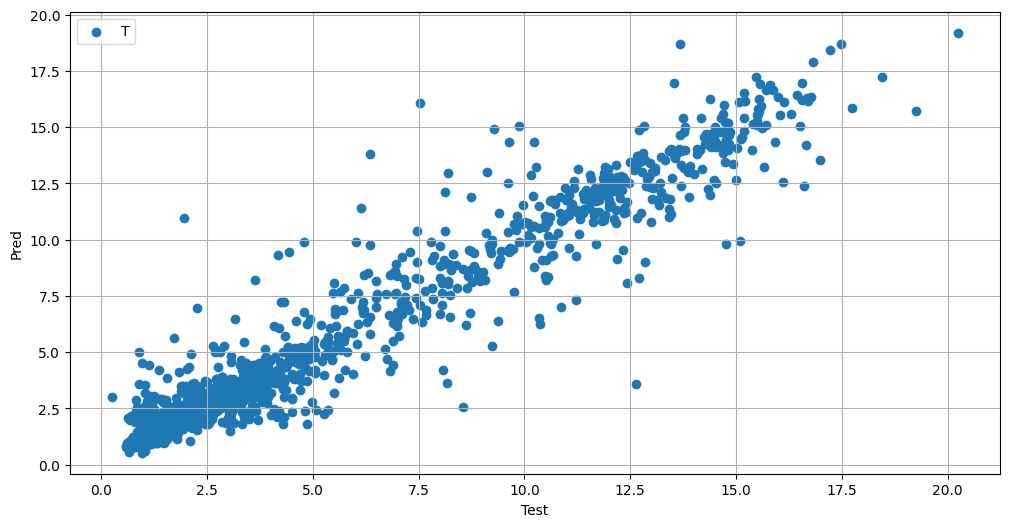

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn6['Test'], results_nn6['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 7

In [ ]:
model_nn7 = Sequential([
    Dense(400, activation='relu', input_shape=(5,)),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn7.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn7 = model_nn7.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 4s 9ms/step - loss: 3.2792 - mae: 0.9562 - val_loss: 1.7420 - val_mae: 0.6781
Epoch 2/150
242/242 [==============================] - 2s 7ms/step - loss: 1.6137 - mae: 0.6820 - val_loss: 1.5279 - val_mae: 0.6774
Epoch 3/150
242/242 [==============================] - 2s 8ms/step - loss: 1.4127 - mae: 0.6513 - val_loss: 1.1989 - val_mae: 0.6038
Epoch 4/150
242/242 [==============================] - 2s 7ms/step - loss: 1.2418 - mae: 0.6073 - val_loss: 1.3397 - val_mae: 0.6303
Epoch 5/150
242/242 [==============================] - 2s 8ms/step - loss: 1.1731 - mae: 0.5908 - val_loss: 1.3952 - val_mae: 0.7224
Epoch 6/150
242/242 [==============================] - 3s 12ms/step - loss: 1.1905 - mae: 0.5900 - val_loss: 1.1686 - val_mae: 0.5634
Epoch 7/150
242/242 [==============================] - 1s 6ms/step - loss: 1.1171 - mae: 0.5602 - val_loss: 1.1302 - val_mae: 0.5458
Epoch 8/150
242/242 [==============================] - 1s 6ms/step -

In [ ]:
# Предсказание на тестовых данных
predict_nn7 = model_nn7.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn7 = mean_absolute_error(y_test, predict_nn7)
r2_nn7 = r2_score(y_test, predict_nn7)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn7:.2f}")
print(f"R-squared (R^2): {r2_nn7:.2f}")

76/76 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.50
R-squared (R^2): 0.94


In [ ]:
results_nn7 = pd.DataFrame(predict_nn7, columns=['Pred'])
results_nn7['Test'] = y_test_new
print(results_nn7.head(50))

         Pred    Test
0    2.297950   2.304
1    4.413418   4.218
2    3.225602   1.839
3    0.882067   0.885
4    4.425752   4.402
5    0.801338   0.800
6   10.319349   9.837
7    2.347615   2.320
8    2.136762   0.955
9    6.829937   7.175
10   2.004462   0.891
11   2.566185   2.537
12   1.589011   1.500
13   0.893656   0.758
14   1.239453   1.341
15   0.869415   1.055
16   0.868067   0.985
17  10.884300   7.855
18   2.823944   2.522
19   0.882870   1.092
20   1.074507   1.138
21   2.526280   2.329
22   3.187236   2.806
23  14.504363  15.918
24   0.912720   0.942
25   8.023682   8.817
26   1.305301   1.456
27   0.854158   0.811
28   9.049182   9.203
29   0.806152   0.724
30   0.843211   0.934
31   0.941213   1.139
32   6.403177   6.905
33  10.584319  11.686
34   6.422943   7.218
35   8.172851  12.704
36   2.171069   2.358
37  12.755164  12.656
38   0.824403   0.886
39   0.890863   1.088
40   0.899612   1.121
41   0.834304   0.804
42   2.584026   1.300
43   0.817857   0.840
44   2.716

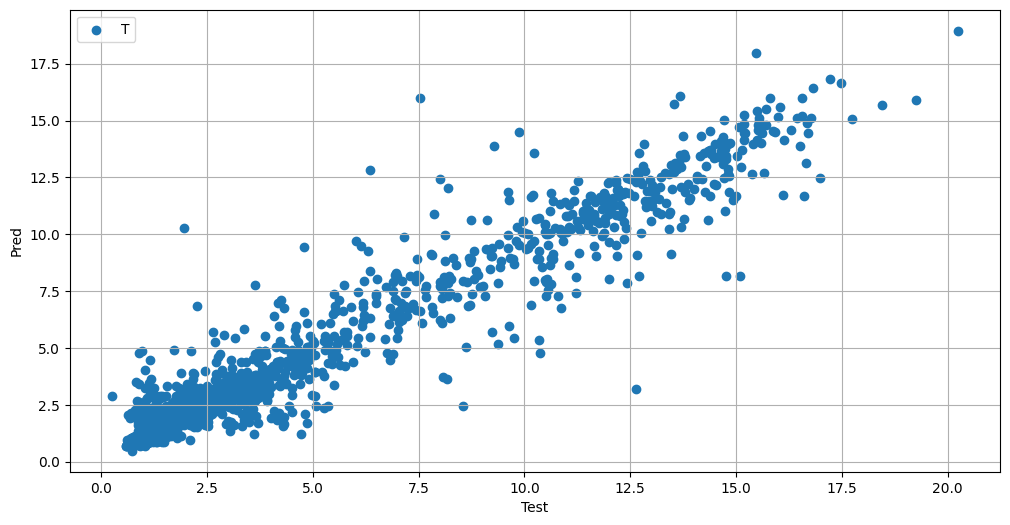

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn7['Test'], results_nn7['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 8

In [ ]:
model_nn8 = Sequential([
    Dense(512, activation='relu', input_shape=(5,)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn8.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn8 = model_nn8.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
242/242 [==============================] - 2s 6ms/step - loss: 2.8209 - mae: 0.9074 - val_loss: 1.6587 - val_mae: 0.7506
Epoch 2/150
242/242 [==============================] - 1s 6ms/step - loss: 1.6275 - mae: 0.7052 - val_loss: 1.3276 - val_mae: 0.6995
Epoch 3/150
242/242 [==============================] - 2s 6ms/step - loss: 1.3586 - mae: 0.6362 - val_loss: 1.1694 - val_mae: 0.5420
Epoch 4/150
242/242 [==============================] - 2s 8ms/step - loss: 1.2098 - mae: 0.5958 - val_loss: 1.2030 - val_mae: 0.6228
Epoch 5/150
242/242 [==============================] - 2s 8ms/step - loss: 1.1542 - mae: 0.5876 - val_loss: 1.2055 - val_mae: 0.5624
Epoch 6/150
242/242 [==============================] - 2s 9ms/step - loss: 1.1508 - mae: 0.5811 - val_loss: 1.0181 - val_mae: 0.5163
Epoch 7/150
242/242 [==============================] - 2s 8ms/step - loss: 1.1420 - mae: 0.5847 - val_loss: 1.0722 - val_mae: 0.5319
Epoch 8/150
242/242 [==============================] - 2s 7ms/step - 

In [ ]:
# Предсказание на тестовых данных
predict_nn8 = model_nn8.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn8 = mean_absolute_error(y_test, predict_nn8)
r2_nn8 = r2_score(y_test, predict_nn8)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn8:.2f}")
print(f"R-squared (R^2): {r2_nn8:.2f}")

76/76 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.48
R-squared (R^2): 0.94


In [ ]:
results_nn8 = pd.DataFrame(predict_nn8, columns=['Pred'])
results_nn8['Test'] = y_test_new
print(results_nn8.head(50))

         Pred    Test
0    2.156941   2.304
1    4.158980   4.218
2    4.886026   1.839
3    0.960653   0.885
4    4.424223   4.402
5    0.890146   0.800
6   10.727862   9.837
7    2.460029   2.320
8    1.850658   0.955
9    6.836226   7.175
10   1.562869   0.891
11   2.443915   2.537
12   1.474206   1.500
13   0.862804   0.758
14   1.339892   1.341
15   0.975051   1.055
16   0.946898   0.985
17   9.204107   7.855
18   2.735959   2.522
19   0.929410   1.092
20   1.208317   1.138
21   2.764559   2.329
22   3.048214   2.806
23  15.762567  15.918
24   1.008963   0.942
25   8.612186   8.817
26   1.319087   1.456
27   0.972754   0.811
28   9.335987   9.203
29   0.953594   0.724
30   0.940384   0.934
31   0.913169   1.139
32   6.621492   6.905
33  11.413033  11.686
34   6.492327   7.218
35   8.226406  12.704
36   2.151959   2.358
37  13.934309  12.656
38   0.861427   0.886
39   0.885784   1.088
40   1.046065   1.121
41   0.888451   0.804
42   0.651720   1.300
43   0.965816   0.840
44   2.985

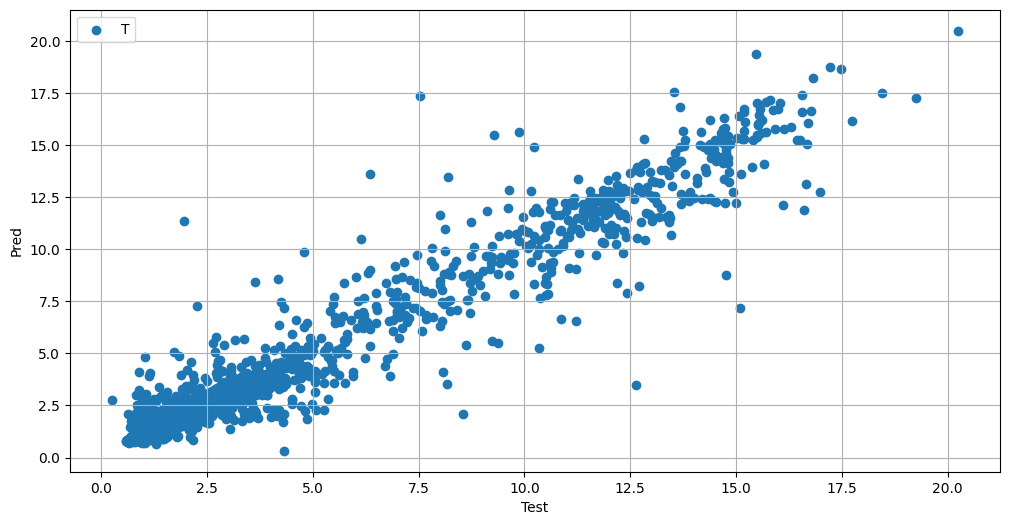

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn8['Test'], results_nn8['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Neural Network 9

In [ ]:
model_nn9 = Sequential([
    Dense(300, activation='relu', input_shape=(5,)),
    Dense(200, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1) # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn9.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn9 = model_nn9.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
242/242 [==============================] - 5s 6ms/step - loss: 3.5706 - mae: 0.9766 - val_loss: 1.5757 - val_mae: 0.6973
Epoch 2/1000
242/242 [==============================] - 1s 4ms/step - loss: 1.6300 - mae: 0.6837 - val_loss: 1.4795 - val_mae: 0.6354
Epoch 3/1000
242/242 [==============================] - 1s 6ms/step - loss: 1.4730 - mae: 0.6679 - val_loss: 1.3117 - val_mae: 0.6459
Epoch 4/1000
242/242 [==============================] - 2s 8ms/step - loss: 1.3065 - mae: 0.6211 - val_loss: 1.1600 - val_mae: 0.6031
Epoch 5/1000
242/242 [==============================] - 2s 7ms/step - loss: 1.2024 - mae: 0.6095 - val_loss: 1.1441 - val_mae: 0.5760
Epoch 6/1000
242/242 [==============================] - 1s 4ms/step - loss: 1.1809 - mae: 0.5891 - val_loss: 1.0919 - val_mae: 0.5416
Epoch 7/1000
242/242 [==============================] - 2s 7ms/step - loss: 1.0920 - mae: 0.5552 - val_loss: 1.5800 - val_mae: 0.6856
Epoch 8/1000
242/242 [==============================] - 1s 6ms

In [ ]:
# Предсказание на тестовых данных
predict_nn9 = model_nn9.predict(x_test)

# Рассчитайте MAE и R-squared
mae_nn9 = mean_absolute_error(y_test, predict_nn9)
r2_nn9 = r2_score(y_test, predict_nn9)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn9:.2f}")
print(f"R-squared (R^2): {r2_nn9:.2f}")

76/76 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.50
R-squared (R^2): 0.93


In [ ]:
results_nn9 = pd.DataFrame(predict_nn9, columns=['Pred'])
results_nn9['Test'] = y_test_new
print(results_nn9.head(50))

         Pred    Test
0    2.182285   2.304
1    4.280097   4.218
2    3.432109   1.839
3    0.896801   0.885
4    4.193724   4.402
5    0.809133   0.800
6   10.428187   9.837
7    3.479068   2.320
8    2.010643   0.955
9    7.852974   7.175
10   1.832828   0.891
11   1.959862   2.537
12   1.745311   1.500
13   0.848665   0.758
14   1.276870   1.341
15   0.900645   1.055
16   0.893828   0.985
17   9.108180   7.855
18   2.710557   2.522
19   0.943810   1.092
20   1.077878   1.138
21   2.620569   2.329
22   2.945393   2.806
23  15.170740  15.918
24   0.946771   0.942
25   9.908532   8.817
26   1.279223   1.456
27   0.897653   0.811
28   8.681974   9.203
29   0.829538   0.724
30   0.882591   0.934
31   0.938809   1.139
32   6.555223   6.905
33  10.998394  11.686
34   6.982322   7.218
35   9.212592  12.704
36   2.156390   2.358
37  12.855592  12.656
38   0.818176   0.886
39   0.934512   1.088
40   0.985173   1.121
41   0.878099   0.804
42   0.417679   1.300
43   0.848980   0.840
44   2.615

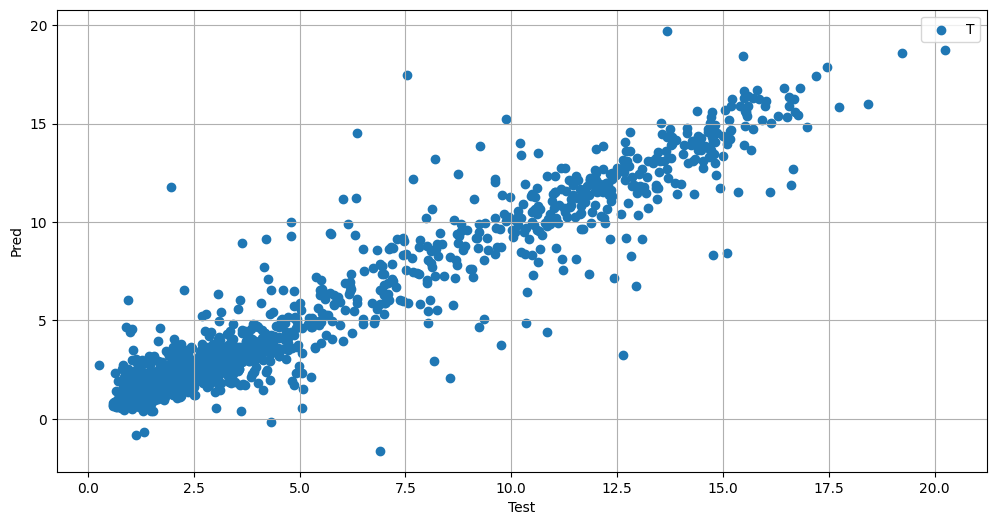

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_nn9['Test'], results_nn9['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Random Forest (2/2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(random_state=42, verbose=1)

param_grid = {
    'n_estimators': [200],  # Количество деревьев
    'max_depth': [10],  # Максимальная глубина деревьев
    'min_samples_split': [10],  # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1],  # Минимальное количество выборок в листовых узлах
    'max_features': ['auto'],  # Количество признаков для разделения
    'bootstrap': [True]  # Использование бутстрэпа для выборки данных
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Лучшая RMSE на обучающих данных: 0.9426269896497554
Mean Absolute Error (MAE): 0.45
R-squared (R^2): 0.95
         Pred    Test
0    2.335975   2.304
1    4.544591   4.218
2    2.724099   1.839
3    0.896135   0.885
4    4.412602   4.402
5    0.803511   0.800
6   10.768454   9.837
7    2.570741   2.320
8    1.553648   0.955
9    6.446352   7.175
10   1.912288   0.891
11   2.410591   2.537
12   1.530135   1.500
13   0.937515   0.758
14   1.372124   1.341
15   0.890824   1.055
16   0.878518   0.985
17   8.071844   7.855
18   2.788686   2.522
19   0.868561   1.092
20   1.130498   1.138
21   2.584184   2.329
22   2.891481   2.806
23  15.133738  15.918
24   0.973719   0.942
25   7.989430   8.817
26   1.426483   1.456
27   0.816786   0.811
28  10.561066   9.203
29   0.898160   0.724
30   0.900963   0.934
31   0.961937   1.139
32   6.803774   6.90

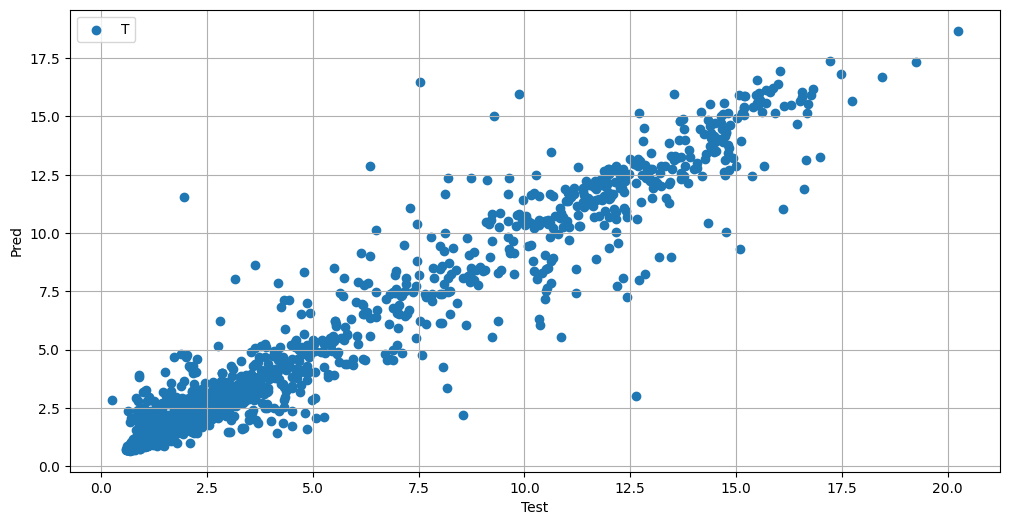

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

grid_search = GridSearchCV(estimator=rf2,
                           param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_params_rf2 = grid_search.best_params_
best_score_rf2 = np.sqrt(-grid_search.best_score_)  # Преобразуем отрицательное MSE в RMSE
print(f"Лучшие параметры: {best_params_rf2}")
print(f"Лучшая RMSE на обучающих данных: {best_score_rf2}")


# Получите предсказания на тестовых данных с лучшими параметрами
best_rf2 = grid_search.best_estimator_
predict_rf2 = best_rf2.predict(x_test)


r2_rf2 = r2_score(y_test, predict_rf2)
mae_rf2 = mean_absolute_error(y_test, predict_rf2)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_rf2:.2f}")
print(f"R-squared (R^2): {r2_rf2:.2f}")


results_rf2 = pd.DataFrame(predict_rf2, columns=['Pred'])
y_test_new = y_test.reset_index(drop=True)
results_rf2['Test'] = y_test_new
print(results_rf2.head(50))


plt.figure(figsize=(12, 6))
plt.scatter(results_rf2['Test'], results_rf2['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

In [ ]:
rf_ens = best_rf2.predict(x_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


# LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dense(units=1))  # Выходной слой с одним нейроном для одной зависимой переменной

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
9644/9644 [==============================] - 25s 3ms/step - loss: 3.2171
Epoch 2/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.9826
Epoch 3/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.7699
Epoch 4/50
9644/9644 [==============================] - 18s 2ms/step - loss: 1.5926
Epoch 5/50
9644/9644 [==============================] - 20s 2ms/step - loss: 1.4633
Epoch 6/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.3221
Epoch 7/50
9644/9644 [==============================] - 18s 2ms/step - loss: 1.2634
Epoch 8/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.1918
Epoch 9/50
9644/9644 [==============================] - 21s 2ms/step - loss: 1.1536
Epoch 10/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.1348
Epoch 11/50
9644/9644 [==============================] - 19s 2ms/step - loss: 1.0811
Epoch 12/50
9644/9644 [==============================] - 18s 2ms/step - lo

In [ ]:
# Оценка модели на тестовых данных
test_loss = model_lstm.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')

predicted_values = model_lstm.predict(x_test)

76/76 [==============================] - 0s 1ms/step - loss: 0.8578
Test Loss: 0.8578193783760071
76/76 [==============================] - 0s 2ms/step


In [ ]:
lstm_ens = model_lstm.predict(x_train)

302/302 [==============================] - 0s 1ms/step


In [ ]:
# Рассчитайте MAE и R-squared
mae_lstm = mean_absolute_error(y_test, predicted_values)
r2_lstm = r2_score(y_test, predicted_values)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"R-squared (R^2): {r2_lstm:.2f}")

Mean Absolute Error (MAE): 0.46
R-squared (R^2): 0.95


In [ ]:
results_lstm = pd.DataFrame(predicted_values, columns=['Pred'])
results_lstm['Test'] = y_test_new
print(results_lstm.head(50))

         Pred    Test
0    2.172914   2.304
1    4.322455   4.218
2    2.889668   1.839
3    0.911264   0.885
4    4.436101   4.402
5    0.832170   0.800
6   10.946516   9.837
7    2.082314   2.320
8    1.949326   0.955
9    6.656033   7.175
10   1.830875   0.891
11   2.436327   2.537
12   1.404494   1.500
13   0.819042   0.758
14   1.315301   1.341
15   0.941772   1.055
16   0.895582   0.985
17   8.171745   7.855
18   2.621370   2.522
19   0.934530   1.092
20   1.211879   1.138
21   2.621307   2.329
22   2.930712   2.806
23  15.375360  15.918
24   0.976572   0.942
25   9.344819   8.817
26   1.233722   1.456
27   0.917860   0.811
28   9.677077   9.203
29   0.878328   0.724
30   0.903265   0.934
31   0.886855   1.139
32   4.410019   6.905
33  10.012825  11.686
34   7.077500   7.218
35   6.677394  12.704
36   2.250349   2.358
37  13.593210  12.656
38   1.004910   0.886
39   0.935313   1.088
40   1.010212   1.121
41   0.833902   0.804
42   1.139565   1.300
43   0.905750   0.840
44   2.893

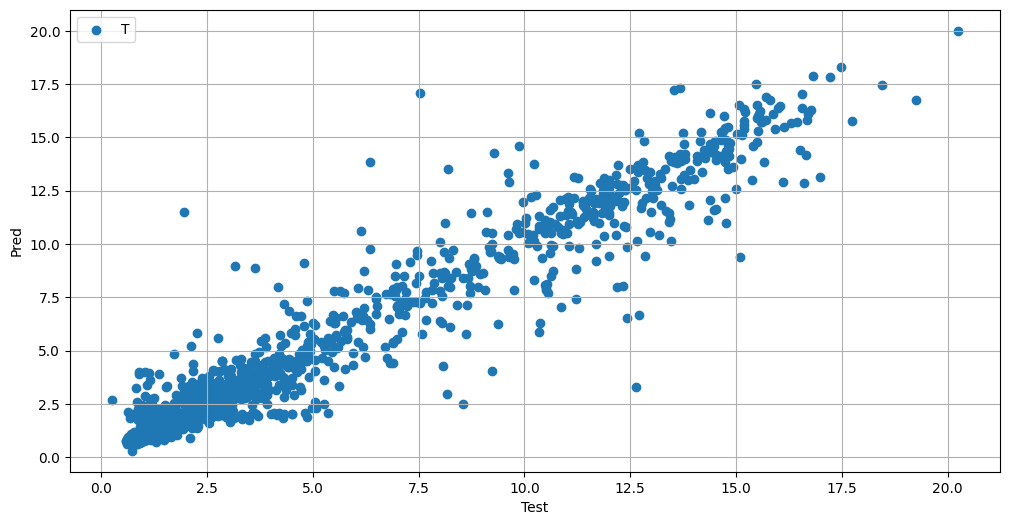

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(results_lstm['Test'], results_lstm['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Ensemble Model 1

In [ ]:
# Соединение результатов всех лучших моделей в один датафрейм

df_ensemble = pd.DataFrame(y_ff_train)

df_ensemble['KNN'] = knr_ens
df_ensemble['RF'] = rf_ens
df_ensemble['LSTM'] = lstm_ens
df_ensemble['NN'] = nn_ens

In [ ]:
print(df_ensemble.info())
print(df_ensemble.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9644 entries, 10023 to 7270
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전력량     9644 non-null   float64
 1   KNN     9644 non-null   float64
 2   RF      9644 non-null   float64
 3   LSTM    9644 non-null   float32
 4   NN      9644 non-null   float32
dtypes: float32(2), float64(3)
memory usage: 376.7 KB
None
          전력량      KNN         RF       LSTM         NN
10023   5.683   8.8897   5.582458   5.605618   6.119137
5364    2.805   2.7602   2.626707   2.705265   2.650068
10      1.834   1.8693   1.899363   1.889693   1.899023
7393    4.723   5.2542   4.841316   5.041566   4.821635
6194    0.834   0.8094   0.800794   0.866062   0.838385
1426    1.134   1.0708   0.958682   0.951195   1.157627
9740    0.797   0.8513   0.928515   0.992665   0.975132
5937    3.594   3.7454   3.752830   4.224406   3.429044
9618   11.156  10.8156  11.084980  11.072621   9.950593
718    10.20

In [ ]:
x_ens = df_ensemble.drop(['전력량'], axis=1)
y_ens = df_ensemble['전력량']

In [ ]:
x_ens_train, x_ens_test, y_ens_train, y_ens_test = train_test_split(
    x_ens, y_ens, test_size=0.2, random_state=42)

scaler_ens = StandardScaler()
scaler_ens.fit(x_ens_train)

x_ens_train = scaler_ens.transform(x_ens_train)
x_ens_test = scaler_ens.transform(x_ens_test)

In [ ]:
rf_ens = RandomForestRegressor(random_state=42, verbose=1)

param_grid = {
    'n_estimators': [200],  # Количество деревьев
    'max_depth': [10],  # Максимальная глубина деревьев
    'min_samples_split': [10],  # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1],  # Минимальное количество выборок в листовых узлах
    'max_features': ['auto'],  # Количество признаков для разделения
    'bootstrap': [True]  # Использование бутстрэпа для выборки данных
}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Лучшая RMSE на обучающих данных: 0.6184452312078799
Mean Absolute Error (MAE): 0.30
R-squared (R^2): 0.98
         Pred   Train
0    0.837980   0.935
1    1.677752   1.719
2    0.920463   0.926
3    1.969061   0.678
4    1.294461   1.789
5    2.051226   1.648
6    0.857674   0.814
7    0.856102   0.984
8    2.598737   4.390
9   13.079501  13.021
10   2.437577   2.239
11   1.170018   1.433
12   2.709049   2.693
13   0.838431   0.832
14   0.950073   0.879
15   1.433794   1.567
16   1.037038   1.051
17   3.745281   2.140
18   3.158209   3.230
19   2.198421   1.650
20  15.247360  14.550
21   1.416023   2.101
22   0.893359   0.895
23   0.804393   0.820
24   2.950266   3.087
25   1.891755   1.060
26   1.006327   0.953
27   3.019656   3.059
28   0.857842   0.901
29   0.920763   0.816
30   1.871699   1.927
31   1.134396   1.185
32   2.986794   2.06

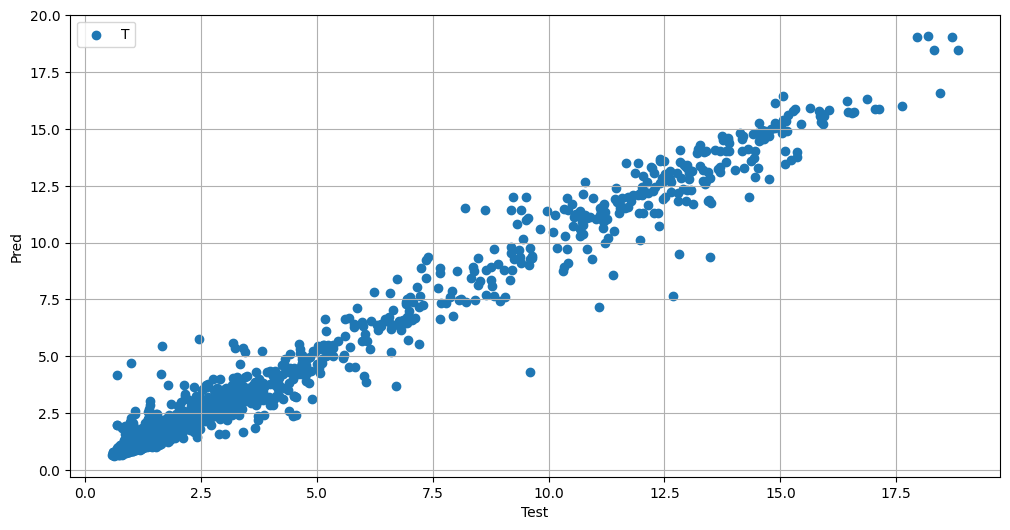

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

grid_search = GridSearchCV(estimator=rf_ens,
                           param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(x_ens_train, y_ens_train)


best_params_rf_ens = grid_search.best_params_
best_score_rf_ens = np.sqrt(-grid_search.best_score_)  # Преобразуем отрицательное MSE в RMSE
print(f"Лучшие параметры: {best_params_rf_ens}")
print(f"Лучшая RMSE на обучающих данных: {best_score_rf_ens}")


# Получите предсказания на тестовых данных с лучшими параметрами
best_rf_ens = grid_search.best_estimator_
predict_rf_ens = best_rf_ens.predict(x_ens_test)


r2_rf_ens = r2_score(y_ens_test, predict_rf_ens)
mae_rf_ens = mean_absolute_error(y_ens_test, predict_rf_ens)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_rf_ens:.2f}")
print(f"R-squared (R^2): {r2_rf_ens:.2f}")


results_rf_ens = pd.DataFrame(predict_rf_ens, columns=['Pred'])
y_ens_new = y_ens_test.reset_index(drop=True)
results_rf_ens['Train'] = y_ens_new
print(results_rf_ens.head(50))


plt.figure(figsize=(12, 6))
plt.scatter(results_rf_ens['Train'], results_rf_ens['Pred'], label='Value')
plt.xlabel('Test')
plt.ylabel('Pred')
plt.legend('Test vs Pred')
plt.grid(True)
plt.show()

# Ensemble Model 2

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_ens_train, y_ens_train, test_size=0.2, random_state=42)

from keras.src.engine.sequential import input_layer
from keras.models import Sequential
from keras.layers import Dense, Dropout

model_nn_ens = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1)  # 1 выходной нейрон для регрессии
])

In [ ]:
model_nn_ens.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_nn_ens = model_nn_ens.fit(x_train, y_ens_train, epochs=150,
                        validation_data=(x_val, y_val))

ValueError: ignored

In [ ]:
# Предсказание на тестовых данных
predict_nn1 = model_nn1.predict(x_enstest)

# Рассчитайте MAE и R-squared
mae_nn1 = mean_absolute_error(y_test, predict_nn1)
r2_nn1 = r2_score(y_test, predict_nn1)

# Вывод оценок
print(f"Mean Absolute Error (MAE): {mae_nn1:.2f}")
print(f"R-squared (R^2): {r2_nn1:.2f}")